# <span style="color:brown">Disease Symptoms and Patient Profile Dataset</span>

The "Disease Symptoms and Patient Profile" dataset is a collection of medical records that captures various symptoms and patient profiles for a range of diseases or medical conditions. It provides valuable insights into the relationship between symptoms, patient characteristics, and disease outcomes.

###  <span style="color:blue">Dataset Features:</span>

    -Disease: The name of the disease or medical condition under consideration.
    -Fever: Indicates whether the patient has a fever (Yes/No).
    -Cough: Indicates whether the patient has a cough (Yes/No).
    -Fatigue: Indicates whether the patient experiences fatigue (Yes/No).
    -Difficulty Breathing: Indicates whether the patient has difficulty breathing (Yes/No).
    -Age: The age of the patient in years.
    -Gender: The gender of the patient (Male/Female).
    -Blood Pressure: The blood pressure level of the patient (Normal/High).
    -Cholesterol Level: The cholesterol level of the patient (Normal/High).
    -Outcome Variable: The outcome variable indicating the result of the diagnosis or assessment for the specific disease(Positive/Negative)

###  <span style="color:blue">Table of Content</span>

   1. [Importing and Reading Data](#Importing-and-Reading-Data)

   2. [Preprocessing](#Preprocessing)

   3. [EDA](#EDA)

   4. [Correlation](#Correlation)

   5. [Train Test Split and Standardization](#Train-Test-Split-and-Standardization)
 
   6. [Model Design](#Model-Design)

   7. [Metrics Evaluation](#Metrics-Evaluation)

   8. [Interpretation](#Interpretation)

   9. [Conclusion](#Conclusion)

### <span style="color:red">Importing and Reading Data</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')

In [3]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [4]:
data.shape

(349, 10)

### <span style="color:red">Preprocessing</span>

In [5]:
data.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

### <span style="color:red">EDA</span>

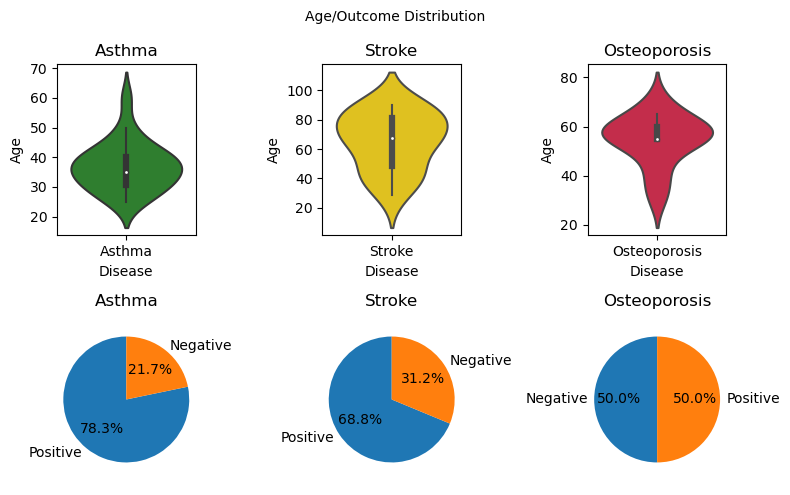

In [6]:
top_diseases = data['Disease'].value_counts().nlargest(3).index.tolist()

colors = ['forestgreen', 'gold', 'crimson']

num_diseases = len(top_diseases)
num_columns = num_diseases
fig, axes = plt.subplots(2, num_columns, figsize=(8, 5))

for i, disease in enumerate(top_diseases):
    filtered_df = data[data['Disease'] == disease]

    sns.violinplot(x='Disease', y='Age', data=filtered_df, ax=axes[0, i], color=colors[i % len(colors)])
    axes[0, i].set_title(disease)
    axes[0, i].set_xlabel('Disease')
    axes[0, i].set_ylabel('Age')

    outcome_counts = filtered_df['Outcome Variable'].value_counts()

    axes[1, i].pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1, i].set_title(disease)
    axes[1, i].axis('equal')
    
fig.suptitle('Age/Outcome Distribution', fontsize = 10)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()

Text(0.5, 0.98, 'Age Distribution by Objective Value')

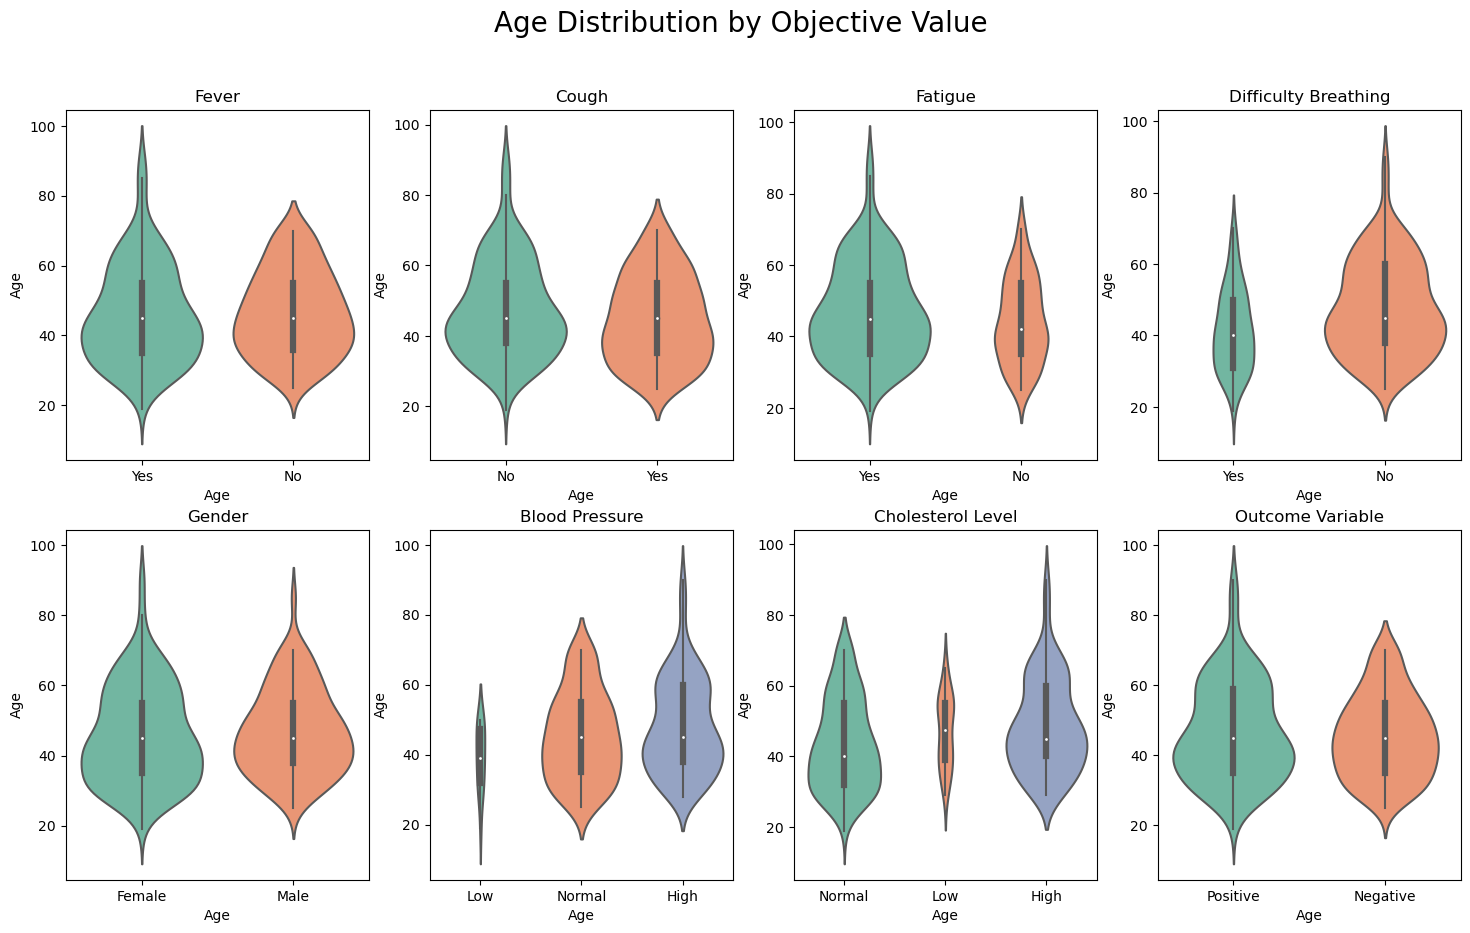

In [7]:
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing','Gender', 'Blood Pressure', 'Cholesterol Level','Outcome Variable']

fig,ax = plt.subplots(ncols = 4, nrows = 2, figsize = (18,10))
ax = ax.flatten()

for i,col in enumerate(cols):
    sns.violinplot(data = data,x = col,y = 'Age',ax = ax[i], scale="count", palette='Set2')
    
    ax[i].set_title(col)
    ax[i].set_xlabel('Age')
    
fig.suptitle('Age Distribution by Objective Value', fontsize = 20)

### <span style="color:red">Correlation</span>

In [8]:
var_mod = ['Disease','Fever','Cough','Fatigue','Difficulty Breathing','Gender','Blood Pressure','Cholesterol Level','Outcome Variable']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [9]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,1,0,1,1,19,0,1,2,1
1,24,0,1,1,0,25,0,2,2,0
2,37,0,1,1,0,25,0,2,2,0
3,6,1,1,0,1,25,1,2,2,1
4,6,1,1,0,1,25,1,2,2,1


Text(0.5, 1.0, 'pearson correlation')

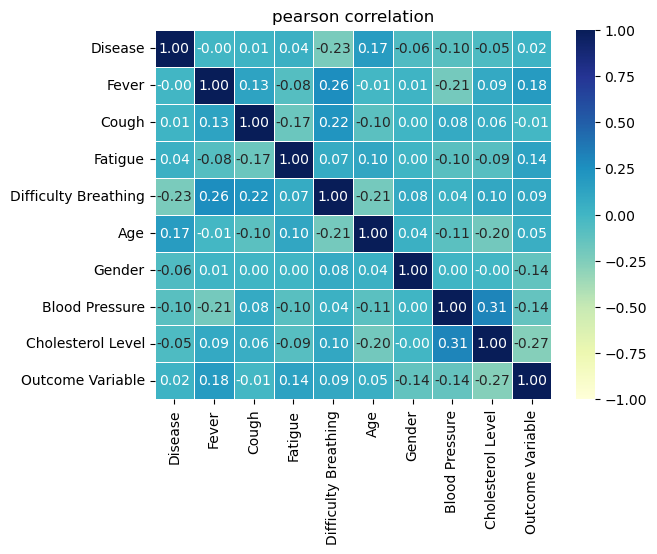

In [10]:
corr_matrix = data.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pearson Correlation")

### <span style="color:red">Train Test Split and Standardization</span>

In [11]:
X = data.drop(columns="Outcome Variable")
y = data['Outcome Variable']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 9)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((261, 9), (261,)), ((88, 9), (88,)))

In [13]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### <span style="color:red">Model Design</span>

In [14]:
algorithms = {'Logistic Regression': 
              {"model": LogisticRegression(),
               "params": {"penalty": ['elasticnet','l1','l2'],"solver": ["newton-cg", "lbfgs","liblinear",'sag',"saga"]}
              },
              
              'Decision Tree': 
              {"model": tree.DecisionTreeClassifier(),
               "params": {"criterion": ['gini','entropy'],"max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],"min_samples_split": [2, 4, 6, 8, 10, 15, 20],"min_samples_leaf": [i for i in range(1, 11)]}
              },
              
              'Random Forest': 
              {"model": RandomForestClassifier(),
               "params": {"n_estimators": [100, 200, 300],"max_features": ["auto", "log2", "sqrt", None],"max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],"min_samples_split": [2, 4, 6, 8, 10, 15, 20]}
              },
              
              'SVM':
              {"model": svm.SVC(probability=True),
               "params": {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],"gamma": ["auto","scale"]}
              },
              
              'NaiveBayes' :
              {"model": GaussianNB(),
               "params": {}
              },
              
              'K-Nearest Neighbors' :
              {"model": KNeighborsClassifier(),
               "params": {"n_neighbors": [3,5,10],"weights": ["uniform", "distance"],"metric": ["euclidean", "manhattan","minkowski"]}
              },
              
              'Gradient Boost' :
              {"model": GradientBoostingClassifier(),
               "params": {"learning_rate": np.arange(0.1, 1, 0.01),"n_estimators": [100, 200, 300],"criterion": ['friedman_mse', 'mse'],"min_samples_split": [2, 4, 6, 8, 10, 15, 20],"min_samples_leaf": [i for i in range(1, 11)],"max_depth": [1, 3, 5, 7, 9, 10, 11, 12, 14, 15, 18, 20, 25, 28, 30, 33, 38, 40],"max_features": ["auto", "log2", "sqrt", None]}
              }
             }

In [15]:
best_model = {}
best_model_details = []

for model_name, values in algorithms.items():
    best_score = float('-inf')
    best_random_state = None

    for random_state in range(100):  # Iterate over different random states
        rscv = RandomizedSearchCV(values["model"], values["params"], cv=5, n_iter=15, n_jobs=-1, verbose=0, random_state=random_state)
        rscv.fit(X_train, y_train)

        if rscv.best_score_ > best_score:
            best_score = rscv.best_score_
            best_random_state = random_state

    best_model[model_name] = rscv
    best_model_details.append({"Model Name": model_name, "Best Score": best_score, "Best Parameters": rscv.best_params_, "Best Random State": best_random_state})
    print(model_name)

Logistic Regression
Decision Tree
Random Forest
SVM
NaiveBayes
K-Nearest Neighbors
Gradient Boost


In [16]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(best_model_details)

,Model Name,Best Score,Best Parameters,Best Random State
0,Logistic Regression,0.616836,"{'solver': 'newton-cg', 'penalty': 'l2'}",0
1,Decision Tree,0.739623,"{'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': 18, 'criterion': 'entropy'}",94
2,Random Forest,0.766401,"{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 28}",93
3,SVM,0.682148,"{'kernel': 'poly', 'gamma': 'scale'}",0
4,NaiveBayes,0.628302,{},0
5,K-Nearest Neighbors,0.747315,"{'weights': 'distance', 'n_neighbors': 10, 'metric': 'manhattan'}",0
6,Gradient Boost,0.751089,"{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 30, 'learning_rate': 0.3599999999999999, 'criterion': 'friedman_mse'}",90


In [17]:
test_model = []

for model_name, model in best_model.items():
    test_model.append({"Model Name": model_name, "Test Score": model.score(X_test, y_test)})

pd.DataFrame(test_model)

,Model Name,Test Score
0,Logistic Regression,0.647727
1,Decision Tree,0.670455
2,Random Forest,0.829545
3,SVM,0.727273
4,NaiveBayes,0.613636
5,K-Nearest Neighbors,0.818182
6,Gradient Boost,0.840909


### <span style="color:red">Metrics Evaluation</span>

In [18]:
train_model_metrics = []
test_model_metrics = []

for model_name, model in best_model.items():
    y_pred_train = model.predict(X_train)
    y_pred_train_probs = model.predict_proba(X_train)[:, 1]
    tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
    
    y_pred_test = model.predict(X_test)
    y_pred_test_probs = model.predict_proba(X_test)[:, 1]
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()
    
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_auc = roc_auc_score(y_train, y_pred_train_probs)
    train_sensitivity = tp_train / (tp_train + fn_train)
    train_specificity = tn_train / (tn_train + fp_train)
    train_mcc = matthews_corrcoef(y_train, y_pred_train)

    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_auc = roc_auc_score(y_test, y_pred_test_probs)
    test_sensitivity = tp_test / (tp_test + fn_test)
    test_specificity = tn_test / (tn_test + fp_test)
    test_mcc = matthews_corrcoef(y_test, y_pred_test)
    
    train_model_metrics.append({"Model Name": model_name, "Mean Absolute Error": train_mae, "Mean Squared Error": train_mse, "Root Mean Squared Error": train_rmse, "AUC": train_auc, "Sensitivity": train_sensitivity, "Specificity": train_specificity, "Matthews correlation coefficient": train_mcc})
    test_model_metrics.append({"Model Name": model_name, "Mean Absolute Error": test_mae, "Mean Squared Error": test_mse, "Root Mean Squared Error": test_rmse, "AUC": test_auc, "Sensitivity": test_sensitivity, "Specificity": test_specificity, "Matthews correlation coefficient": test_mcc})
    

train_model_metrics = pd.DataFrame(train_model_metrics)
test_model_metrics = pd.DataFrame(test_model_metrics)

In [19]:
print("-------- Training Data Metrics --------")
train_model_metrics

-------- Training Data Metrics --------


,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,AUC,Sensitivity,Specificity,Matthews correlation coefficient
0,Logistic Regression,0.363985,0.363985,0.603311,0.718122,0.671642,0.598425,0.270848
1,Decision Tree,0.183908,0.183908,0.428845,0.924080,0.738806,0.897638,0.642706
2,Random Forest,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
3,SVM,0.187739,0.187739,0.433289,0.886385,0.813433,0.811024,0.624346
4,NaiveBayes,0.356322,0.356322,0.596927,0.719415,0.626866,0.661417,0.288283
5,K-Nearest Neighbors,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
6,Gradient Boost,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
print("-------- Test Data Metrics --------")
test_model_metrics

-------- Test Data Metrics --------


,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,AUC,Sensitivity,Specificity,Matthews correlation coefficient
0,Logistic Regression,0.352273,0.352273,0.593526,0.743056,0.634615,0.666667,0.296337
1,Decision Tree,0.329545,0.329545,0.574060,0.745459,0.615385,0.750000,0.360133
2,Random Forest,0.170455,0.170455,0.412861,0.910256,0.865385,0.777778,0.646103
3,SVM,0.272727,0.272727,0.522233,0.740919,0.750000,0.694444,0.441157
4,NaiveBayes,0.386364,0.386364,0.621582,0.716880,0.538462,0.722222,0.258756
5,K-Nearest Neighbors,0.181818,0.181818,0.426401,0.917735,0.826923,0.805556,0.627801
6,Gradient Boost,0.159091,0.159091,0.398862,0.890491,0.846154,0.833333,0.674462


### <span style="color:red">Interpretation</span>

#### <span style="color:blue">1. R Squared:</span>

    -R-squared is a measure of how well the model fits the data.
    
    -A higher R-squared value indicates a better fit.
    
    -In the training data, the "Random Forest" model gives 0.77 R Squared Value, followed by "Gradient Boost" and "K-Nearest Neighbors".
    
    -In test data the "Gradient Boost" model gives 0.84 R Squared Value, followed by "Random Forest" and "KNN".

#### <span style="color:blue">2. Mean Absolute Error (MAE):</span>

    -Mean absolute error is the average of the absolute errors between the predicted values and the actual values.
    
    -The lower the MAE, the better the model's performance.
    
    -In the training data, the "Gradient Boost" model has the lowest MAE of 0, followed by the "Random Forest" and "Decision Tree" models with low values.
    
    -In the test data, the "Gradient Boost" model also has the lowest MAE of 0.16, followed by the "Random Forest" and "Decision Tree" models.

####  <span style="color:blue">3. Mean Squared Error (MSE):</span>

    -Mean squared error is the average of the squared errors between the predicted values and the actual values.
    
    -A lower MSE indicates better model performance.
    
    -In both the training and test data, the "Gradient Boost," "Random Forest" and "Decision Tree" models have MSE values of 0, indicating a perfect fit to the data.

####  <span style="color:blue">4. Root Mean Squared Error (RMSE):</span>

    -RMSE measures the average squared difference between the predicted and actual values, and a lower RMSE indicates better accuracy.
    
    -In both the training and test data, the "Gradient Boost" model has the lowest RMSE values, followed by the "Random Forest" and "Decision Tree" models.

####  <span style="color:blue">5. AUC (Area Under the Curve):</span>

    -AUC represents the model's ability to distinguish between classes.

    -A higher AUC value indicates better predictive performance.

    -In the training data, the "Random Forest" model has the highest AUC value of 1.0, indicating best predictive ability. 

    -In the test data, the "K-Nearest Neighbors" model has the highest AUC value of 0.92, closely followed by the "Gradient Boost" and "Random Forest" models.

####  <span style="color:blue">6. Sensitivity and Specificity:</span>

    -Sensitivity is the proportion of positive instances that were correctly classified as positive.

    -Specificity is the proportion of negative instances that were correctly classified as negative. 

    -In the training data, the "Random Forest," "Decision Tree," and "Gradient Boost" models have perfect sensitivity and specificity values of 1.0. 

    -In the test data, the "K-Nearest Neighbors" model has the highest sensitivity and specificity values.

####  <span style="color:blue">7. Matthews Correlation Coefficient (MCC):</span>

    -MCC combines multiple evaluation metrics into a single value, representing the overall quality of the classification. 

    -A higher Matthews correlation coefficient indicates a better model. 

    -In both training and test data, the "Gradient Boost","Random Forest" and "Decision Tree" models have MCC values of 1.0.

###  <span style="color:red">Conclusion</span>

    -Based on these metrics, the "Gradient Boost" model consistently performs well across multiple evaluation criteria, including low MAE and RMSE values, high AUC, perfect sensitivity and specificity, and an MCC value of 1.0. 

    -Therefore, the "Gradient Boost" model can be considered the best model among the ones evaluated.